In [23]:
import pandas as pd
oil_prices = pd.read_excel("./전국_주유소_가격.xlsx")
oil_prices

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,강원도,사천주유소,강원 강릉시 사천면 동해대로 3662,GS칼텍스,033-645-5182,Y,-,1505,1725,1500
1,강원도,금마주유소,강원 영월군 주천면 송학주천로 1002,S-OIL,033-372-0488,N,-,1495,1695,1500
2,강원도,영월랜드주유소,강원 영월군 한반도면 강원남로 267,GS칼텍스,033-372-8981,Y,-,1485,1650,1600
3,강원도,쌍용장원주유소,강원 영월군 한반도면 강원남로 153,S-OIL,033-372-5145,Y,-,1475,1645,1500
4,강원도,삼팔선주유소,강원도 양양군 현북면 동해대로 1252,SK에너지,033-671-8988,Y,-,1668,1848,1500
...,...,...,...,...,...,...,...,...,...,...
12280,충청북도,가나안주유소,충북 증평군 증평읍 중부로 2271,SK에너지,043-836-5149,Y,-,1499,1669,1500
12281,충청북도,용강주유소,충북 증평군 증평읍 광장로 404,현대오일뱅크,043-838-4444,N,-,1529,1759,1400
12282,충청북도,유진주유소,충청북도 증평군 증평읍 하평로 51,GS칼텍스,043-838-5947,N,-,1538,1738,1500
12283,충청북도,해찬주유소,충북 증평군 증평읍 중부로 2475,S-OIL,043-838-5811,Y,-,1435,1655,-


In [24]:
oil_prices["지역"].value_counts

<bound method IndexOpsMixin.value_counts of 0         강원도
1         강원도
2         강원도
3         강원도
4         강원도
         ... 
12280    충청북도
12281    충청북도
12282    충청북도
12283    충청북도
12284    충청북도
Name: 지역, Length: 12285, dtype: object>

In [25]:
gg_oil = oil_prices.loc[oil_prices["지역"] == "경기도", ["고급휘발유", "휘발유", "경유", "실내등유"]]
gg_oil

,고급휘발유,휘발유,경유,실내등유
637,1798,1525,1725,-
638,1768,1558,1768,1520
639,-,1567,1747,-
640,-,1555,1775,-
641,-,1572,1819,1600
...,...,...,...,...
3511,-,1568,1798,1550
3512,-,1558,1785,1600
3513,-,1548,1789,1600
3514,-,1545,1768,1700


In [26]:
gg_oil.loc[gg_oil["고급휘발유"] == "-"]

,고급휘발유,휘발유,경유,실내등유
639,-,1567,1747,-
640,-,1555,1775,-
641,-,1572,1819,1600
642,-,1485,1665,-
644,-,1549,1769,1600
...,...,...,...,...
3511,-,1568,1798,1550
3512,-,1558,1785,1600
3513,-,1548,1789,1600
3514,-,1545,1768,1700


In [27]:
gg_oil.loc[gg_oil["고급휘발유"] == "-", "고급휘발유"] = 0
gg_oil.loc[gg_oil["휘발유"] == "-", "휘발유"] = 0
gg_oil.loc[gg_oil["경유"] == "-", "경유"] = 0
gg_oil.loc[gg_oil["실내등유"] == "-", "실내등유"] = 0
gg_oil

,고급휘발유,휘발유,경유,실내등유
637,1798,1525,1725,0
638,1768,1558,1768,1520
639,0,1567,1747,0
640,0,1555,1775,0
641,0,1572,1819,1600
...,...,...,...,...
3511,0,1568,1798,1550
3512,0,1558,1785,1600
3513,0,1548,1789,1600
3514,0,1545,1768,1700


In [33]:
gg_oil["고급휘발유"] =gg_oil["고급휘발유"].astype("int64")
gg_oil["휘발유"] =gg_oil["휘발유"].astype("int64")
gg_oil["경유"] =gg_oil["경유"].astype("int64")
gg_oil["실내등유"] =gg_oil["실내등유"].astype("int64")
gg_oil

,고급휘발유,휘발유,경유,실내등유
637,1798,1525,1725,0
638,1768,1558,1768,1520
639,0,1567,1747,0
640,0,1555,1775,0
641,0,1572,1819,1600
...,...,...,...,...
3511,0,1568,1798,1550
3512,0,1558,1785,1600
3513,0,1548,1789,1600
3514,0,1545,1768,1700


In [29]:
gg_oil.mean() # Series
df = gg_oil.mean().reset_index() # Series -> Data Frame
df.columns = ["oil type", "avg price"]
df

,oil type,avg price
0,고급휘발유,376.724557
1,휘발유,1518.015630
2,경유,1716.550191
3,실내등유,899.735672


<AxesSubplot: xlabel='oil type', ylabel='avg price'>

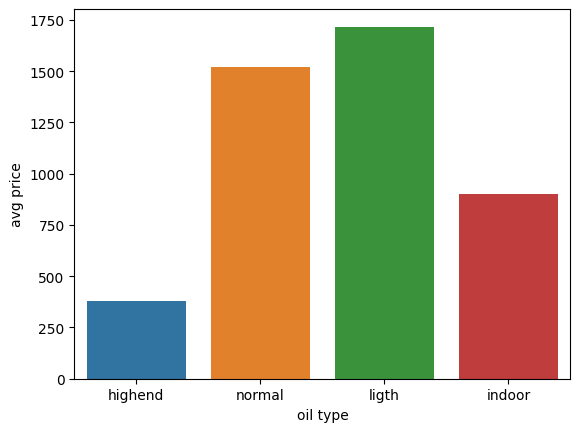

In [30]:
import seaborn as sns

df["oil type"] = ["highend", "normal", "light", "indoor"]

sns.barplot(data=df, x="oil type", y="avg price")

<AxesSubplot: xlabel='normal', ylabel='Count'>

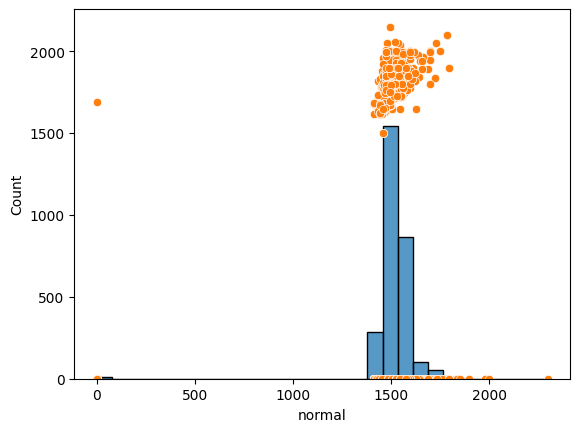

In [37]:
gg_oil.columns=["highend", "normal", "light", "indoor"]
sns.histplot(data=gg_oil, x="normal", bins=30)
sns.scatterplot(data=gg_oil, x="normal", y="highend")